P(X = 0) = 0.1074
P(X = 1) = 0.2684
P(X = 2) = 0.3020
P(X = 3) = 0.2013
P(X = 4) = 0.0881
P(X = 5) = 0.0264
P(X = 6) = 0.0055
P(X = 7) = 0.0008
P(X = 8) = 0.0001
P(X = 9) = 0.0000
P(X = 10) = 0.0000


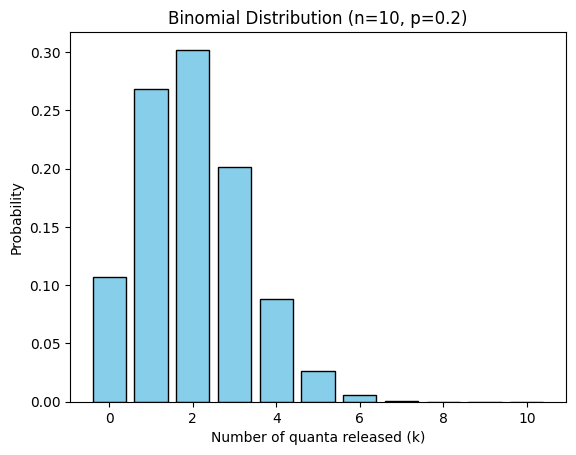

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 10   # number of quanta (trials)
p = 0.2  # probability of release (success per trial)

# Values of k (number of quanta released)
k_values = np.arange(0, n+1)

# Compute binomial probabilities
probs = binom.pmf(k_values, n, p)

# Print probabilities
for k, prob in zip(k_values, probs):
    print(f"P(X = {k}) = {prob:.4f}")

# Plot the probability distribution
plt.bar(k_values, probs, color="skyblue", edgecolor="black")
plt.xlabel("Number of quanta released (k)")
plt.ylabel("Probability")
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.show()

P(X=8 | n=14, p=0.1) = 0.0000159592
P(X=8 | n=14, p=0.7) = 0.1262022741

Likelihood at each decile p:
  p=0.1 -> L=0.0000159592
  p=0.2 -> L=0.0020152792
  p=0.3 -> L=0.0231800095
  p=0.4 -> L=0.0918211579
  p=0.5 -> L=0.1832885742
  p=0.6 -> L=0.2065976053
  p=0.7 -> L=0.1262022741
  p=0.8 -> L=0.0322444670
  p=0.9 -> L=0.0012926930
  p=1.0 -> L=0.0000000000

Most likely decile: p=0.6 (L=0.2065976053)

MLE: p_hat = 0.571429 with L(p_hat) = 0.2115388948


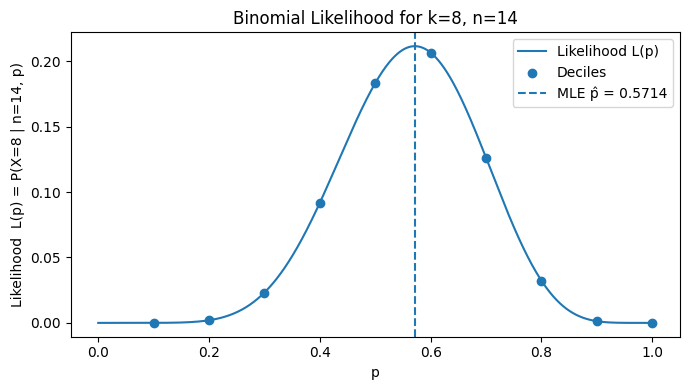

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Observed data
n = 14
k = 8

# Binomial PMF (no SciPy needed)
def binom_pmf(n, k, p):
    return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

# 1) Specific hypotheses: p = 0.1 and p = 0.7
p1 = 0.1
p2 = 0.7
prob_p1 = binom_pmf(n, k, p1)
prob_p2 = binom_pmf(n, k, p2)

print(f"P(X=8 | n=14, p=0.1) = {prob_p1:.10f}")
print(f"P(X=8 | n=14, p=0.7) = {prob_p2:.10f}")

# 2) Likelihood at each decile
deciles = np.round(np.arange(0.1, 1.0 + 0.1, 0.1), 1)
lik_deciles = [(float(p), binom_pmf(n, k, float(p))) for p in deciles]

print("\nLikelihood at each decile p:")
for p, L in lik_deciles:
    print(f"  p={p:.1f} -> L={L:.10f}")

# Which decile maximizes the likelihood?
best_decile, best_L = max(lik_deciles, key=lambda t: t[1])
print(f"\nMost likely decile: p={best_decile:.1f} (L={best_L:.10f})")

# 3) Maximum-likelihood estimate (continuous p)
p_hat = k / n
L_hat = binom_pmf(n, k, p_hat)
print(f"\nMLE: p_hat = {p_hat:.6f} with L(p_hat) = {L_hat:.10f}")

# 4) Plot the likelihood curve and mark deciles + MLE
ps = np.linspace(0.0001, 0.9999, 1000)  # avoid 0 and 1 to keep numbers finite
Ls = [binom_pmf(n, k, p) for p in ps]

plt.figure(figsize=(7,4))
plt.plot(ps, Ls, label="Likelihood L(p)")
plt.scatter(deciles, [binom_pmf(n, k, p) for p in deciles], label="Deciles", zorder=3)
plt.axvline(p_hat, linestyle="--", label=f"MLE p̂ = {p_hat:.4f}")
plt.xlabel("p")
plt.ylabel("Likelihood  L(p) = P(X=8 | n=14, p)")
plt.title("Binomial Likelihood for k=8, n=14")
plt.legend()
plt.tight_layout()
plt.show()

=== Specific p = 0.1 ===
L(p=0.1) = 1.237818721500e-07
log L(p=0.1) = -15.904744915931

=== Likelihood at deciles ===
p= 0.0  ->  L=0.000000000000e+00   logL=-inf
p= 0.1  ->  L=1.237818721500e-07   logL=-15.904744915931492
p= 0.2  ->  L=1.732842750806e-04   logL=-8.660577103497953
p= 0.3  ->  L=4.550575422829e-03   logL=-5.392501587459659
p= 0.4  ->  L=1.897003133922e-02   logL=-3.96489484299538
p= 0.5  ->  L=2.239646762609e-02   logL=-3.7988520278199727
p= 0.6  ->  L=8.431125039654e-03   logL=-4.775825059211709
p= 0.7  ->  L=8.358199756217e-04   logL=-7.087097308234063
p= 0.8  ->  L=1.083026719254e-05   logL=-11.433165825737738
p= 0.9  ->  L=1.528171261111e-09   logL=-20.299194070603935
p= 1.0  ->  L=0.000000000000e+00   logL=-inf

Best decile: p=0.5 with L=2.239646762609e-02

Analytical MLE: p_hat = (k1+k2)/(2n) = 0.46428571
Refined-grid MLE (10001 pts): p ≈ 0.46430714 with L=2.405619759542e-02
L(p_hat) = 2.405619821701e-02    (should match the refined-grid result closely)


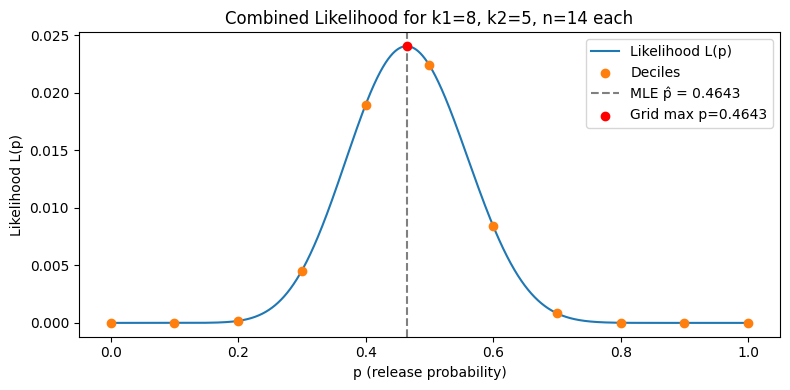


Total trials N = 28, p_hat = 0.464286, SE(p_hat) = 0.094250
 N= 28 -> SE = 0.094250
 N= 56 -> SE = 0.066645
 N=140 -> SE = 0.042150
 N=280 -> SE = 0.029804


In [3]:
# Combined-likelihood analysis for two independent binomial measurements
import numpy as np
import math
import matplotlib.pyplot as plt
from math import comb, log

# Data
n = 14
k1 = 8
k2 = 5

def binom_pmf(n,k,p):
    return comb(n,k) * (p**k) * ((1-p)**(n-k))

# 1) Likelihood and log-likelihood at p = 0.1
p_test = 0.1
L_p_test = binom_pmf(n, k1, p_test) * binom_pmf(n, k2, p_test)
logL_p_test = math.log(L_p_test) if L_p_test>0 else float('-inf')

print("=== Specific p = 0.1 ===")
print(f"L(p=0.1) = {L_p_test:.12e}")
print(f"log L(p=0.1) = {logL_p_test:.12f}\n")

# 2) Likelihood at deciles 0.0, 0.1, ..., 1.0
deciles = np.round(np.arange(0.0, 1.0+0.1, 0.1), 1)
decile_results = []
for p in deciles:
    if p==0.0 or p==1.0:
        L = 0.0
        logL = float('-inf')
    else:
        L = binom_pmf(n, k1, p) * binom_pmf(n, k2, p)
        logL = math.log(L)
    decile_results.append((p, L, logL))

print("=== Likelihood at deciles ===")
for p, L, logL in decile_results:
    print(f"p={p: .1f}  ->  L={L:.12e}   logL={logL if L>0 else '-inf'}")

# Which decile is best?
best_decile = max(decile_results, key=lambda t: t[1])
print(f"\nBest decile: p={best_decile[0]} with L={best_decile[1]:.12e}")

# 3) Analytical MLE (continuous) and refined grid search
p_hat = (k1 + k2) / (2*n)   # total successes / total trials
print(f"\nAnalytical MLE: p_hat = (k1+k2)/(2n) = {p_hat:.8f}")

# refine grid
ps = np.linspace(0.0001, 0.9999, 10001)
Ls = np.array([binom_pmf(n, k1, p) * binom_pmf(n, k2, p) for p in ps])
imax = Ls.argmax()
p_best = ps[imax]
L_best = Ls[imax]
print(f"Refined-grid MLE (10001 pts): p ≈ {p_best:.8f} with L={L_best:.12e}")

# Compare L at analytic p_hat
L_at_phat = binom_pmf(n, k1, p_hat) * binom_pmf(n, k2, p_hat)
print(f"L(p_hat) = {L_at_phat:.12e}    (should match the refined-grid result closely)")

# 4) Plot likelihood curve and mark deciles and MLE
plt.figure(figsize=(8,4))
plt.plot(ps, Ls, label='Likelihood L(p)')
plt.scatter(deciles, [r[1] for r in decile_results], color='C1', zorder=5, label='Deciles')
plt.axvline(p_hat, linestyle='--', color='gray', label=f'MLE p̂ = {p_hat:.4f}')
plt.scatter([p_best], [L_best], color='red', zorder=6, label=f'Grid max p={p_best:.4f}')
plt.xlabel('p (release probability)')
plt.ylabel('Likelihood L(p)')
plt.title('Combined Likelihood for k1=8, k2=5, n=14 each')
plt.legend()
plt.tight_layout()
plt.show()

# 5) How estimate improves with larger sample size: show standard error for p_hat
N_total = 2*n
se = math.sqrt(p_hat*(1-p_hat) / N_total)
print(f"\nTotal trials N = {N_total}, p_hat = {p_hat:.6f}, SE(p_hat) = {se:.6f}")
for N in [N_total, 2*N_total, 5*N_total, 10*N_total]:
    seN = math.sqrt(p_hat*(1-p_hat)/N)
    print(f" N={N:3d} -> SE = {seN:.6f}")


In [4]:
import numpy as np

# Data
counts = np.array([0,0,3,7,10,19,26,16,16,5,5,0,0,0,0])
k_values = np.arange(15)
n = 14
num_experiments = counts.sum()

# Total successes
total_successes = np.sum(k_values * counts)
total_trials = n * num_experiments

# MLE
p_hat = total_successes / total_trials
print(f"Maximum-likelihood estimate (p̂) = {p_hat:.4f}")

Maximum-likelihood estimate (p̂) = 0.4359


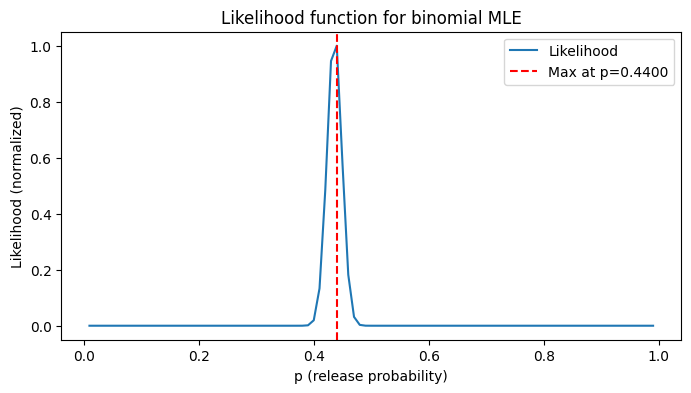

MLE from grid search: p̂ = 0.4400


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Data
counts = np.array([0,0,3,7,10,19,26,16,16,5,5,0,0,0,0])
k_values = np.arange(15)
n = 14
num_experiments = counts.sum()

# Total likelihood function (log-likelihood to avoid underflow)
def log_likelihood(p):
    if p <= 0 or p >= 1:
        return -np.inf  # avoid log(0)
    ll = 0
    for k, c in zip(k_values, counts):
        ll += c * (np.log(comb(n,k)) + k*np.log(p) + (n-k)*np.log(1-p))
    return ll

# Grid of p values
p_grid = np.arange(0.01, 1.0, 0.01)
logL_values = np.array([log_likelihood(p) for p in p_grid])
L_values = np.exp(logL_values - max(logL_values))  # normalize to avoid underflow

# Plot
plt.figure(figsize=(8,4))
plt.plot(p_grid, L_values, label='Likelihood')
plt.xlabel('p (release probability)')
plt.ylabel('Likelihood (normalized)')
plt.title('Likelihood function for binomial MLE')
plt.axvline(p_grid[np.argmax(L_values)], linestyle='--', color='red', label=f"Max at p={p_grid[np.argmax(L_values)]:.4f}")
plt.legend()
plt.show()

# Report MLE from grid
p_hat_grid = p_grid[np.argmax(L_values)]
print(f"MLE from grid search: p̂ = {p_hat_grid:.4f}")

In [7]:
from scipy.optimize import minimize_scalar

# Negative log-likelihood (since we minimize)
def neg_log_likelihood(p):
    return -log_likelihood(p)

result = minimize_scalar(neg_log_likelihood, bounds=(0.001, 0.999), method='bounded')
p_hat_opt = result.x
print(f"MLE from optimization: p̂ = {p_hat_opt:.6f}")

MLE from optimization: p̂ = 0.435914


In [8]:
from math import comb

# Parameters
n = 14
k = 7
p_null = 0.3

# Binomial probability
P_k_given_null = comb(n, k) * (p_null**k) * ((1-p_null)**(n-k))
print(f"P(X=7 | n=14, p=0.3) = {P_k_given_null:.6f}")

P(X=7 | n=14, p=0.3) = 0.061813


In [9]:
import scipy.stats as st

# One-sided p-value (probability of observing k >= 7)
p_value_one_sided = st.binom.sf(k-1, n, p_null)  # sf = 1 - cdf(k-1)
print(f"One-sided p-value (k >= 7) = {p_value_one_sided:.4f}")

# Two-sided p-value (extreme in both tails)
p_value_two_sided = 2 * min(st.binom.cdf(k, n, p_null), st.binom.sf(k-1, n, p_null))
print(f"Two-sided p-value = {p_value_two_sided:.4f}")

One-sided p-value (k >= 7) = 0.0933
Two-sided p-value = 0.1866


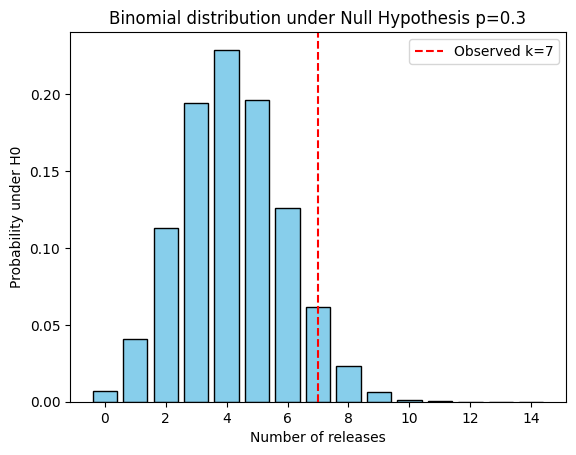

In [10]:
import matplotlib.pyplot as plt

k_values = np.arange(0, n+1)
probs = st.binom.pmf(k_values, n, p_null)

plt.bar(k_values, probs, color='skyblue', edgecolor='black')
plt.axvline(k, color='red', linestyle='--', label=f'Observed k={k}')
plt.xlabel('Number of releases')
plt.ylabel('Probability under H0')
plt.title('Binomial distribution under Null Hypothesis p=0.3')
plt.legend()
plt.show()
